## Logistic Regression Modeling - Spreads to Probabilities

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## Run some vizzes to work with the logistical regression 

In [4]:
path = r'C:\Users\greg\Documents\NFL\survivor_sim\processed_data'

spread_scores = pd.read_csv(path + '\\spreadspoke_scores_processed.csv')
spread_scores.head()


,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,winner,favorite_won,team_underdog_id
0,0,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,...,False,79.0,9.0,87.0,NaN,TB,DET,TB,True,DET
1,1,11/23/1980,1980,12,False,Tampa Bay Buccaneers,10.0,24.0,Detroit Lions,TB,...,False,69.0,9.0,77.0,NaN,TB,DET,DET,False,DET
2,2,10/04/1981,1981,5,False,Tampa Bay Buccaneers,28.0,10.0,Detroit Lions,TB,...,False,76.0,9.0,76.0,NaN,TB,DET,TB,True,DET
3,3,12/26/1982,1982,8,False,Tampa Bay Buccaneers,23.0,21.0,Detroit Lions,TB,...,False,73.0,11.0,72.0,NaN,TB,DET,TB,True,DET
4,4,09/04/1983,1983,1,False,Tampa Bay Buccaneers,0.0,11.0,Detroit Lions,TB,...,False,82.0,7.0,83.0,NaN,TB,DET,DET,False,DET


In [5]:
df = spread_scores[['spread_favorite','favorite_won']
                ].groupby(by = 'spread_favorite').agg(['mean', 'count'])

In [6]:
df.reset_index(inplace = True)

In [7]:
df.head()

spread_favorite favorite_won      
                          mean count
0           -26.5          1.0     1
1           -24.5          1.0     1
2           -24.0          1.0     1
3           -22.5          1.0     1
4           -20.5          1.0     2

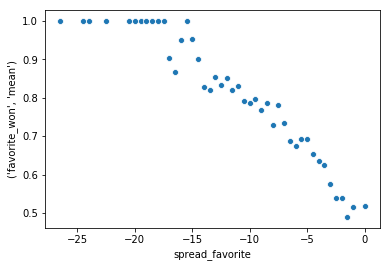

In [8]:
sns.scatterplot(data = df, x = 'spread_favorite', y = ('favorite_won','mean'))

In [9]:
spread_scores.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,winner,favorite_won,team_underdog_id
0,0,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,...,False,79.0,9.0,87.0,NaN,TB,DET,TB,True,DET
1,1,11/23/1980,1980,12,False,Tampa Bay Buccaneers,10.0,24.0,Detroit Lions,TB,...,False,69.0,9.0,77.0,NaN,TB,DET,DET,False,DET
2,2,10/04/1981,1981,5,False,Tampa Bay Buccaneers,28.0,10.0,Detroit Lions,TB,...,False,76.0,9.0,76.0,NaN,TB,DET,TB,True,DET
3,3,12/26/1982,1982,8,False,Tampa Bay Buccaneers,23.0,21.0,Detroit Lions,TB,...,False,73.0,11.0,72.0,NaN,TB,DET,TB,True,DET
4,4,09/04/1983,1983,1,False,Tampa Bay Buccaneers,0.0,11.0,Detroit Lions,TB,...,False,82.0,7.0,83.0,NaN,TB,DET,DET,False,DET


C:\Users\greg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


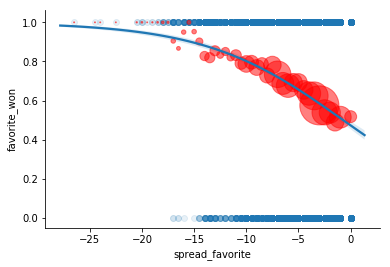

In [10]:
fig, ax  = plt.subplots()
sns.regplot(x = 'spread_favorite', y='favorite_won', data=spread_scores, 
            logistic=True, ax = ax, scatter_kws={'alpha':0.1})
x = df['spread_favorite']
y = df[('favorite_won','mean')]
s = df[('favorite_won','count')]
ax.scatter(x = x, y = y, c = 'r',s = s,alpha = .5)
sns.despine()

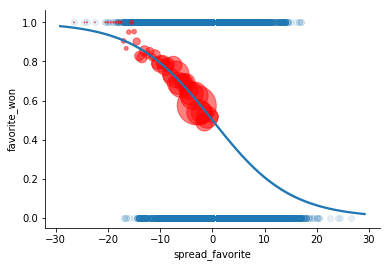

In [11]:
# try it as a mirror image to see how it changes
X = pd.concat([spread_scores.spread_favorite, -spread_scores.spread_favorite])
y = pd.concat([spread_scores.favorite_won, -spread_scores.favorite_won])


fig, ax  = plt.subplots()
sns.regplot(x = X, y= y, 
            logistic=True, ax = ax, scatter_kws={'alpha':0.1})
x = df['spread_favorite']
y = df[('favorite_won','mean')]
s = df[('favorite_won','count')]
ax.scatter(x = x, y = y, c = 'r',s = s,alpha = .5)
sns.despine()

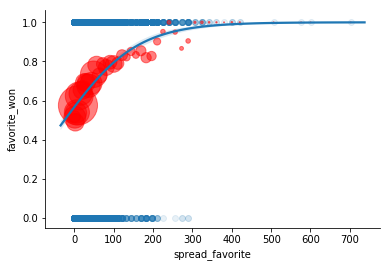

In [12]:
# try it as a log norm to see how it changes
X = spread_scores.spread_favorite**2
y = spread_scores.favorite_won


fig, ax  = plt.subplots()
sns.regplot(x = X, y= y, 
            logistic=True, ax = ax, scatter_kws={'alpha':0.1})
x = df['spread_favorite']**2
y = df[('favorite_won','mean')]
s = df[('favorite_won','count')]
ax.scatter(x = x, y = y, c = 'r',s = s,alpha = .5)
sns.despine()

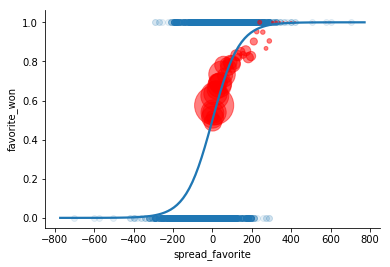

In [13]:
# try it as a mirror image to see how it changes
X = pd.concat([spread_scores.spread_favorite**2, -(spread_scores.spread_favorite**2)])
y = pd.concat([spread_scores.favorite_won, -spread_scores.favorite_won])


fig, ax  = plt.subplots()
sns.regplot(x = X, y= y, 
            logistic=True, ax = ax, scatter_kws={'alpha':0.1})
x = df['spread_favorite']**2
y = df[('favorite_won','mean')]
s = df[('favorite_won','count')]
ax.scatter(x = x, y = y, c = 'r',s = s,alpha = .5)
sns.despine()

Concluding from this - just make the spread squared a feature and let the log regression wieght the two.    

In [14]:
spread_scores.columns

Index(['Unnamed: 0', 'schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
       'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail', 'team_home_id', 'team_away_id',
       'winner', 'favorite_won', 'team_underdog_id'],
      dtype='object')

In [15]:
spread_scores.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,winner,favorite_won,team_underdog_id
0,0,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,...,False,79.0,9.0,87.0,NaN,TB,DET,TB,True,DET
1,1,11/23/1980,1980,12,False,Tampa Bay Buccaneers,10.0,24.0,Detroit Lions,TB,...,False,69.0,9.0,77.0,NaN,TB,DET,DET,False,DET
2,2,10/04/1981,1981,5,False,Tampa Bay Buccaneers,28.0,10.0,Detroit Lions,TB,...,False,76.0,9.0,76.0,NaN,TB,DET,TB,True,DET
3,3,12/26/1982,1982,8,False,Tampa Bay Buccaneers,23.0,21.0,Detroit Lions,TB,...,False,73.0,11.0,72.0,NaN,TB,DET,TB,True,DET
4,4,09/04/1983,1983,1,False,Tampa Bay Buccaneers,0.0,11.0,Detroit Lions,TB,...,False,82.0,7.0,83.0,NaN,TB,DET,DET,False,DET


## scikitlearn logistical regression model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X = spread_scores.spread_favorite
X = X.values.reshape(-1, 1) 
y = spread_scores.favorite_won

In [18]:
lr = LogisticRegression().fit(X, y)


C:\Users\greg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
spreads = df['spread_favorite'].values.reshape(-1, 1)

In [20]:
lr.predict_proba(X)[:,1]

array([0.58480743, 0.58480743, 0.51029319, ..., 0.81345927, 0.65563493,
       0.58480743])

## write the model to a pickle file 
Work with pickle files
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/


In [21]:
import pickle

In [22]:
# save the model to disk
filename = 'log_reg_spread_model.pkl'
pickle.dump(lr, open(path+filename, 'wb'))
 

In [23]:
# load the model from disk
loaded_model = pickle.load(open(path+filename, 'rb'))
result = loaded_model.predict_proba(X)[:,1]
result

array([0.58480743, 0.58480743, 0.51029319, ..., 0.81345927, 0.65563493,
       0.58480743])

## Run some single week probabilities

In [24]:
week7 = pd.read_excel(path+'\\week_7.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\greg\\Documents\\NFL\\survivor_sim\\processed_data\\week_7.xlsx'

#### Use the regression function

In [ ]:
week7.sort_values(by='Spread', inplace = True)

In [ ]:
spreads = week7.Spread.values.reshape(-1, 1)
week7['probs'] = lr.predict_proba(spreads)[:,1]

In [ ]:
# assume that the bettors are 100 to make the math easier
week7.Bettors = round(week7.Bettors*100/week7.Bettors.sum())
week7.Bettors.sum()

In [ ]:
week7

It works - the logisitic regression from point spreads will be the basic model used in the algorithms